<a href="https://colab.research.google.com/github/preetamjumech/LLM/blob/main/NLP_with_LLMs_Fine_tuning_Models_for_Language_Translation%2C_%26_Summarization_07_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CausalLanguageModeling_FineTunig

In [ ]:
!pip install transformers datasets evaluate

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00


In [ ]:
from os.path import split
import numpy as np
import pandas as pd
from datasets import load_dataset
wikitext_ds = load_dataset(path = "wikitext", name = "wikitext-2-raw-v1", split = "train[:1000]")
wikitext_ds

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 1000
})

In [ ]:
wikitext_ds = wikitext_ds.train_test_split(test_size=0.2)
wikitext_ds

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 800
    })
    test: Dataset({
        features: ['text'],
        num_rows: 200
    })
})

In [ ]:
wikitext_ds["train"][9]

{'text': ' A Little Book of Rhymes New and Old ; Blackie , 1937 \n'}

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def preprocess_function(examples):
  return tokenizer(examples["text"])

In [ ]:
tokenized_wikitext_ds = wikitext_ds.map(
    preprocess_function,
    batched = True,
    num_proc = 4,
    remove_columns = wikitext_ds["train"].column_names
)

tokenized_wikitext_ds

Map (num_proc=4):   0%|          | 0/800 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/200 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 800
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 200
    })
})

In [ ]:
wikitext_ds["train"][9]

{'text': ' A Little Book of Rhymes New and Old ; Blackie , 1937 \n'}

In [ ]:
tokenized_wikitext_ds["train"][9]

{'input_ids': [317,
  7703,
  4897,
  286,
  10323,
  22009,
  968,
  290,
  5706,
  2162,
  2619,
  494,
  837,
  28684,
  220,
  198],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.decode(tokenized_wikitext_ds["train"][9]["input_ids"])

' A Little Book of Rhymes New and Old ; Blackie, 1937 \n'

In [ ]:
examples = tokenized_wikitext_ds["train"][3:6]
print(examples)
print("keys:", examples.keys())
print("input_ids:", examples["input_ids"])
print("attention_mask:", examples["attention_mask"])

{'input_ids': [[4930, 15911, 35030, 547, 4635, 837, 1708, 1123, 286, 262, 983, 705, 82, 1388, 4048, 39558, 1846, 6888, 290, 371, 8207, 64, 764, 1119, 547, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 17871, 78, 299, 8182, 609, 1134, 1872, 645, 367, 2271, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 10263, 238, 235, 43266, 26945, 33778, 45739, 241, 18566, 5641, 164, 46788, 837, 6578, 764, 569, 18354, 7496, 286, 262, 30193, 513, 1058, 383, 20025, 286, 262, 17871, 5321, 37838, 1267, 837, 18542, 416, 11013, 726, 11308, 32671, 271, 6909, 290, 4191, 2716, 287, 734, 15343, 706, 852, 11389, 1143, 287, 360, 3540, 4106, 6669, 1219, 1022, 2813, 290, 2321, 2162, 290, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 532, 33901, 8182, 791, 1326, 72, 645, 32840, 22064, 19740, 462, 12, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 532, 164, 113, 97, 33778, 34402, 233, 37772, 121, 5641, 36704, 20046, 247, 42637, 

In [ ]:
concatenated_examples = { k: sum(examples[k],[]) for k in examples.keys()}

print("keys:", concatenated_examples.keys())
print("input_ids:", concatenated_examples["input_ids"])
print("attention_mask:", concatenated_examples["attention_mask"])

keys: dict_keys(['input_ids', 'attention_mask'])
input_ids: [4930, 15911, 35030, 547, 4635, 837, 1708, 1123, 286, 262, 983, 705, 82, 1388, 4048, 39558, 1846, 6888, 290, 371, 8207, 64, 764, 1119, 547, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 17871, 78, 299, 8182, 609, 1134, 1872, 645, 367, 2271, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 10263, 238, 235, 43266, 26945, 33778, 45739, 241, 18566, 5641, 164, 46788, 837, 6578, 764, 569, 18354, 7496, 286, 262, 30193, 513, 1058, 383, 20025, 286, 262, 17871, 5321, 37838, 1267, 837, 18542, 416, 11013, 726, 11308, 32671, 271, 6909, 290, 4191, 2716, 287, 734, 15343, 706, 852, 11389, 1143, 287, 360, 3540, 4106, 6669, 1219, 1022, 2813, 290, 2321, 2162, 290, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 532, 33901, 8182, 791, 1326, 72, 645, 32840, 22064, 19740, 462, 12, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 532, 164, 113, 97, 33778, 34402, 233,

In [ ]:
d = {}
for k in examples.keys():
  d[k] = sum(examples[k], [])

print(d)


{'input_ids': [4930, 15911, 35030, 547, 4635, 837, 1708, 1123, 286, 262, 983, 705, 82, 1388, 4048, 39558, 1846, 6888, 290, 371, 8207, 64, 764, 1119, 547, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 17871, 78, 299, 8182, 609, 1134, 1872, 645, 367, 2271, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 10263, 238, 235, 43266, 26945, 33778, 45739, 241, 18566, 5641, 164, 46788, 837, 6578, 764, 569, 18354, 7496, 286, 262, 30193, 513, 1058, 383, 20025, 286, 262, 17871, 5321, 37838, 1267, 837, 18542, 416, 11013, 726, 11308, 32671, 271, 6909, 290, 4191, 2716, 287, 734, 15343, 706, 852, 11389, 1143, 287, 360, 3540, 4106, 6669, 1219, 1022, 2813, 290, 2321, 2162, 290, 2311, 73, 13090, 645, 569, 18354, 7496, 513, 1058, 532, 33901, 8182, 791, 1326, 72, 645, 32840, 22064, 19740, 462, 12, 357, 10545, 230, 99, 161, 254, 112, 5641, 44444, 9202, 25084, 24440, 12675, 11839, 18, 532, 164, 113, 97, 33778, 34402, 233, 37772, 121, 5641, 36704, 20046, 247, 42637, 1

In [ ]:
p = {}
d  = { "a": [[1,2,3]], "b":[[4,5,6]]}
p['a'] = sum(d['a'], [])
p

{'a': [1, 2, 3]}

In [ ]:
block_size = 128

def group_texts(examples):
  concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}

  total_length = len(concatenated_examples[list(examples.keys())[0]])
  if total_length >= block_size:
    total_length = (total_length // block_size) * block_size

  result = {
      k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
      for k, t in concatenated_examples.items()
  }

  result["labels"] = result["input_ids"].copy()
  return result


# Practice

In [ ]:
e = tokenized_wikitext_ds["train"][9:10]
# e = (e["input_ids"])
print(e)

{'input_ids': [[317, 7703, 4897, 286, 10323, 22009, 968, 290, 5706, 2162, 2619, 494, 837, 28684, 220, 198]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
exam = {k: sum(e[k], []) for k in e.keys()}
exam

{'input_ids': [317,
  7703,
  4897,
  286,
  10323,
  22009,
  968,
  290,
  5706,
  2162,
  2619,
  494,
  837,
  28684,
  220,
  198],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
total_length = len(exam[list(e.keys())[0]])

In [ ]:
total_length

16

In [ ]:
list(e.keys())[0]

'input_ids'

In [ ]:
exam["input_ids"]

[317,
 7703,
 4897,
 286,
 10323,
 22009,
 968,
 290,
 5706,
 2162,
 2619,
 494,
 837,
 28684,
 220,
 198]

In [ ]:
block_size = 8
if total_length >= block_size:
  total_length = (total_length // block_size) * block_size

total_length

16

In [ ]:
17//8

2

In [ ]:
17//8 * 8

16

In [ ]:
for k, v in e.items():
  print(k)
  print(v)

input_ids
[[317, 7703, 4897, 286, 10323, 22009, 968, 290, 5706, 2162, 2619, 494, 837, 28684, 220, 198]]
attention_mask
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
result = {
    k: t[i : i + block_size] for i in range(0,  total_length, block_size)
    for k, t in exam.items()

}

result
result["labels"] = result["input_ids"].copy()
result

{'input_ids': [5706, 2162, 2619, 494, 837, 28684, 220, 198],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [5706, 2162, 2619, 494, 837, 28684, 220, 198]}

#Code

In [ ]:
wikitext_lm_dataset = tokenized_wikitext_ds.map(
    group_texts,
    batched = True,
    num_proc = 4
)

Map (num_proc=4):   0%|          | 0/800 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
wikitext_lm_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 386
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 93
    })
})

In [ ]:
tokenizer.decode(wikitext_lm_dataset["train"][9]["input_ids"])

' Sen of Rediff.com was more critical of her dialogue delivery, calling it " unfortunate. " The film received mixed reviews from critics, but with worldwide revenue of over ₹ 3 @.@ 75 billion ( US $ 56 million ), it became the fourth highest @-@ grossing Bollywood film. The film established Fernandez as one of the most popular Bollywood actresses. \n The Gambia also has an under @-@ 19 team that was to play in the African Women\'s U @-@ 19 Championship in 2002. The Gambia\'s first match was against Morocco, but the team withdrew from the'

In [ ]:
len(wikitext_lm_dataset["train"][9]["input_ids"])

128

In [ ]:
tokenizer.decode(wikitext_lm_dataset["train"][45]["input_ids"])

' team had attempted to trade Nash at the player\'s request. Nash stated that he had requested the trade after being informed that the franchise was going into another rebuilding phase. He further noted that he felt that he " could be a huge part of that towards bringing assets in, " and in his view " it was the best thing for the team, the organization, and personally for [ his ] career. " After the personnel changes, the Blue Jackets closed out the month with a three @-@ game losing streak. \n Barker\'s sketches, drawings, and paintings of children were given to friends or to the parents of the subjects'

In [ ]:
len(wikitext_lm_dataset["train"][45]["input_ids"])

128

In [ ]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm = False, return_tensors = "tf")

In [ ]:
from transformers import create_optimizer, AdamWeightDecay
optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate= 0.01)

In [ ]:
from transformers import TFAutoModelForCausalLM
model = TFAutoModelForCausalLM.from_pretrained("distilgpt2")

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

In [ ]:
tf_train_set = model.prepare_tf_dataset(
    wikitext_lm_dataset["train"],
    shuffle = True,
    batch_size = 32,
    collate_fn = data_collator
)

tf_test_set = model.prepare_tf_dataset(
    wikitext_lm_dataset["test"],
    shuffle = False,
    batch_size = 32,
    collate_fn = data_collator
)

In [ ]:
import tensorflow as tf
model.compile(optimizer = optimizer)
model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLay  multiple                  81912576  
 er)                                                             
                                                                 
Total params: 81912576 (312.47 MB)
Trainable params: 81912576 (312.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(tf_train_set, validation_data = tf_test_set, epochs = 3)

Epoch 1/3
12/12 [==============================] - 1163s 94s/step - loss: 4.5961 - val_loss: 4.2308
Epoch 2/3
12/12 [==============================] - 1136s 95s/step - loss: 4.3536 - val_loss: 4.1085
Epoch 3/3
12/12 [==============================] - 1143s 96s/step - loss: 4.2053 - val_loss: 4.0208


In [ ]:
import math

eval_loss  = model.evaluate(tf_test_set)
print(f"Perplexity: {math.exp(eval_loss):.2f}")

3/3 [==============================] - 132s 43s/step - loss: 4.0208
Perplexity: 55.75


In [ ]:
# Save your trained TensorFlow model to a local directory
model.save_pretrained("my_clm_model")
tokenizer.save_pretrained('my_clm_model')

('my_clm_model/tokenizer_config.json',
 'my_clm_model/special_tokens_map.json',
 'my_clm_model/vocab.json',
 'my_clm_model/merges.txt',
 'my_clm_model/added_tokens.json',
 'my_clm_model/tokenizer.json')

In [ ]:
test_sentence = "The Sun"


In [ ]:
from transformers import TFAutoModelForCausalLM, AutoTokenizer, pipeline

# Load the model from the folder
model = TFAutoModelForCausalLM.from_pretrained('/content/my_clm_model')
# Load the tokenizer from the same folder
tokenizer = AutoTokenizer.from_pretrained('/content/my_clm_model')
generator = pipeline("text-generation", model = model, tokenizer=tokenizer)
generator(test_sentence)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at /content/my_clm_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


[{'generated_text': 'The Sun was destroyed on 5 May 1813: The Sun lost its face and died at the age of sixty at the age of fifty.[5] This death was caused by a bullet in early April 1813, with the latter killed in a short'}]

In [ ]:
inputs = tokenizer(test_sentence, return_tensors = "tf").input_ids
inputs

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[ 464, 3825]], dtype=int32)>

In [ ]:
outputs = model.generate(input_ids = inputs, max_new_tokens = 100, do_sample = True, top_k = 50, top_p = 0.95)
outputs

<tf.Tensor: shape=(1, 102), dtype=int32, numpy=
array([[  464,  3825,   290,   314,   373,   287,   262,  9244,   274,
          286,   257,  1175,  1022,   606,   475,   691,   611,   356,
          714,  1282,   510,   351,   281,  6942,   835,   286, 16937,
          606,    13,   383,  1255,   373,    11,   319,   262, 10388,
           11,   257,   517, 40590,   290, 32757,   995,    13,   632,
          373,   788,   326,   262,  3517,   661,   508, 12030,   262,
         3594, 25708,  2540,   284,  3292,   351,  4492,   764,  1119,
          750,   407, 12831,   262,  7674,  2405,   764,   383,   517,
         1637,   484,  9477,   837,   262,   517,   484,  2626,   262,
         7674,   484,  2714,   764,   198,   464,  3594,   661,   550,
          587, 27307,   422,  4492,   764,   383,  5637, 17622,   286,
         5491,   547,  1908]], dtype=int32)>

In [ ]:
tokenizer.batch_decode(outputs, skip_special_tokens = True)


['The Sun and I was in the throes of a war between them but only if we could come up with an efficient way of achieving them. The result was, on the contrary, a more economical and prosperous world. It was then that the British people who occupied the English countryside began to trade with England. They did not acquire the territory themselves. The more money they acquired, the more they lost the territory they held.\nThe English people had been expelled from England. The remaining inhabitants of Britain were sent']

# Masked Language Modeling_FineTuning

In [ ]:
!pip install transformers datasets evaluate


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
wikitext_ds = load_dataset(path = "wikitext", name = "wikitext-2-raw-v1", split = "train[:1000]")
wikitext_ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 1000
})

In [ ]:
wikitext_ds = wikitext_ds.train_test_split(test_size = 0.2)
wikitext_ds

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 800
    })
    test: Dataset({
        features: ['text'],
        num_rows: 200
    })
})

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def preprocess_function(examples):
  return tokenizer(examples["text"])

In [ ]:
tokenized_wikitext_ds = wikitext_ds.map(
    preprocess_function,
    batched = True,
    num_proc = 4,
    remove_columns = wikitext_ds["train"].column_names
)
tokenized_wikitext_ds

Map (num_proc=4):   0%|          | 0/800 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/200 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 800
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 200
    })
})

In [ ]:
block_size = 128

def group_texts(examples):
  concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
  total_length = len(concatenated_examples[list(examples.keys())[0]])
  if total_length >= block_size:
    total_length = (total_length // block_size) * block_size
  result = {
      k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
      for k, t in concatenated_examples.items()
  }
  return result

In [ ]:
wikitext_lm_dataset = tokenized_wikitext_ds.map(
    group_texts,
    batched = True,
    num_proc = 4
)

Map (num_proc=4):   0%|          | 0/800 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm_probability = 0.15, return_tensors = "tf")

In [ ]:
from transformers import create_optimizer, AdamWeightDecay
optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate = 0.01)

In [ ]:
from transformers import TFAutoModelForMaskedLM
model = TFAutoModelForMaskedLM.from_pretrained("distilroberta-base")

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForMaskedLM.

All the weights of TFRobertaForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


In [ ]:
tf_train_set = model.prepare_tf_dataset(
    wikitext_lm_dataset["train"],
    shuffle = True,
    batch_size = 16,
    collate_fn = data_collator
)

tf_test_set = model.prepare_tf_dataset(
    wikitext_lm_dataset["test"],
    shuffle = False,
    batch_size = 16,
    collate_fn = data_collator
)

In [ ]:
import tensorflow as tf
model.compile(optimizer = optimizer)
model.summary()

Model: "tf_roberta_for_masked_lm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  81527808  
 r)                                                              
                                                                 
 lm_head (TFRobertaLMHead)   multiple                  39642969  
                                                                 
Total params: 82170201 (313.45 MB)
Trainable params: 82170201 (313.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x = tf_train_set, validation_data = tf_test_set, epochs = 1)

24/24 [==============================] - 703s 29s/step - loss: 2.8638 - val_loss: 2.4310


In [ ]:
import math
eval_loss = model.evaluate(tf_test_set)
print(f"Perplexity: {math.exp(eval_loss):.2f}")

7/7 [==============================] - 63s 9s/step - loss: 2.3903
Perplexity: 10.92


In [ ]:
text1 = " USA plans to <mask> its own spacve station after 2024"
text2 = "I am planning to <mask> this holiddays."

In [ ]:
# Save your trained TensorFlow model to a local directory
model.save_pretrained("my_mlm_model")
tokenizer.save_pretrained('my_mlm_model')

('my_mlm_model/tokenizer_config.json',
 'my_mlm_model/special_tokens_map.json',
 'my_mlm_model/vocab.json',
 'my_mlm_model/merges.txt',
 'my_mlm_model/added_tokens.json',
 'my_mlm_model/tokenizer.json')

In [ ]:
from transformers import TFAutoModelForMaskedLM, AutoTokenizer, pipeline


# Load the model from the folder
model = TFAutoModelForMaskedLM.from_pretrained('/content/my_mlm_model')
# Load the tokenizer from the same folder
tokenizer = AutoTokenizer.from_pretrained('/content/my_mlm_model')

All model checkpoint layers were used when initializing TFRobertaForMaskedLM.

All the layers of TFRobertaForMaskedLM were initialized from the model checkpoint at /content/my_mlm_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


In [ ]:
from transformers import pipeline
mask_filler = pipeline("fill-mask", model = model, tokenizer = tokenizer)
mask_filler(text1)

[{'score': 0.4622440040111542,
  'token': 1119,
  'token_str': ' build',
  'sequence': ' USA plans to build its own spacve station after 2024'},
 {'score': 0.08846834301948547,
  'token': 5242,
  'token_str': ' establish',
  'sequence': ' USA plans to establish its own spacve station after 2024'},
 {'score': 0.06632661819458008,
  'token': 1709,
  'token_str': ' launch',
  'sequence': ' USA plans to launch its own spacve station after 2024'},
 {'score': 0.05862677842378616,
  'token': 12558,
  'token_str': ' construct',
  'sequence': ' USA plans to construct its own spacve station after 2024'},
 {'score': 0.039651766419410706,
  'token': 33,
  'token_str': ' have',
  'sequence': ' USA plans to have its own spacve station after 2024'}]

In [ ]:
mask_filler(text2)

[{'score': 0.13128963112831116,
  'token': 2725,
  'token_str': ' attend',
  'sequence': 'I am planning to attend this holiddays.'},
 {'score': 0.04990297555923462,
  'token': 3379,
  'token_str': ' celebrate',
  'sequence': 'I am planning to celebrate this holiddays.'},
 {'score': 0.03542526811361313,
  'token': 1183,
  'token_str': ' watch',
  'sequence': 'I am planning to watch this holiddays.'},
 {'score': 0.032827042043209076,
  'token': 946,
  'token_str': ' hold',
  'sequence': 'I am planning to hold this holiddays.'},
 {'score': 0.023627908900380135,
  'token': 2649,
  'token_str': ' miss',
  'sequence': 'I am planning to miss this holiddays.'}]

# Language Translation English To Spanish Fine Tuning

In [ ]:
!pip install transformers datasets evaluate sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
eng_spa_data = pd.read_csv('data.csv')
eng_spa_data.head()

,english,spanish
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.


In [ ]:
eng_spa_data.shape

(118964, 2)

In [ ]:
eng_spa_data = eng_spa_data.sample(frac= 0.01)
eng_spa_data.shape

(1190, 2)

In [ ]:
eng_spa_data["id"] = range(len(eng_spa_data))
eng_spa_data.sample(5)

,english,spanish,id
95244,I would like to be a pilot in the future.,En el futuro me gustaría ser un piloto.,607
86564,There's plenty of food in the pantry.,Hay comida suficiente en la despensa.,725
84709,Your name was deleted from the list.,Su nombre fue borrado de la lista.,787
41327,Nobody wants to help you.,Nadie quiere ayudarte.,842
31932,I need you to trust me.,Necesito que confíes en mí.,645


In [ ]:
translation_dicts = []
for index, row in eng_spa_data.iterrows():
  translation_dict = {
      "id": row["id"],
      "translation":{
          "en": row["english"],
          "es": row["spanish"]
      }
  }
  translation_dicts.append(translation_dict)

In [ ]:
translation_dicts[:5]

[{'id': 0, 'translation': {'en': 'I said stop.', 'es': 'Dije que pararas.'}},
 {'id': 1,
  'translation': {'en': 'She is an educated girl.',
   'es': 'Ella es una niña educada.'}},
 {'id': 2,
  'translation': {'en': 'No matter what happens, Tom always shows up on time.',
   'es': 'Sin importar lo que pase, Tom siempre llega a tiempo.'}},
 {'id': 3,
  'translation': {'en': 'That is all I know about him.',
   'es': 'Eso es todo lo que sé sobre él.'}},
 {'id': 4,
  'translation': {'en': 'It was fantastic.', 'es': 'Fue fantástico.'}}]

In [ ]:
len(translation_dicts)

1190

In [ ]:
from datasets import Dataset
eng_spa_dataset = Dataset.from_list(translation_dicts)
eng_spa_dataset

Dataset({
    features: ['id', 'translation'],
    num_rows: 1190
})

In [ ]:
eng_spa_dataset = eng_spa_dataset.train_test_split(test_size = 0.2)
eng_spa_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 952
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 238
    })
})

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-small")
tokenizer

T5TokenizerFast(name_or_path='t5-small', vocab_size=32100, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<extra_id_43>', '<extra_i

In [ ]:
source_lang = "en"
target_lang = "es"

prefix = "translate English to Spanish: "

def preprocess_function(examples):
  inputs = [prefix + example[source_lang] for example in examples["translation"]]
  targets = [example[target_lang] for example in examples["translation"]]
  model_inputs = tokenizer(inputs, text_target = targets, max_length = 128, truncation = True)
  return model_inputs


In [ ]:
tokenized_eng_spa_dataset = eng_spa_dataset.map(preprocess_function, batched = True)
tokenized_eng_spa_dataset

Map:   0%|          | 0/952 [00:00<?, ? examples/s]

Map:   0%|          | 0/238 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 952
    })
    test: Dataset({
        features: ['id', 'translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 238
    })
})

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer, model = "t5-small",
                                       label_pad_token_id = tokenizer.pad_token_id,
                                       return_tensors="tf")

In [ ]:
tokenizer.pad_token_id

0

In [ ]:
import evaluate
metric = evaluate.load("sacrebleu")


In [ ]:
predictions = ["This is not cool", "Movie was terrible"]
references = [["Hi John, Where re you?", "hello there!"], ["How are you doing?", "How are you doing?"]]

In [ ]:
results = metric.compute(predictions = predictions, references = references)
results

{'score': 0.0,
 'counts': [0, 0, 0, 0],
 'totals': [7, 5, 3, 1],
 'precisions': [0.0, 0.0, 0.0, 0.0],
 'bp': 0.8668778997501817,
 'sys_len': 7,
 'ref_len': 8}

In [ ]:
predictions = ["Hi John, Where are you?", "How are you doing?"]
references = [["Hi John, Where re you?", "hello there!"], ["How are you doing?", "How are you doing?"]]

In [ ]:
results = metric.compute(predictions = predictions, references = references)
results

{'score': 69.18912876154525,
 'counts': [11, 8, 5, 3],
 'totals': [12, 10, 8, 6],
 'precisions': [91.66666666666667, 80.0, 62.5, 50.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [ ]:
def postprocess_text(preds, labels):
  preds = [pred.strip() for pred in preds]
  labels = [[label.strip()] for label in labels]
  return preds, labels

In [ ]:
def compute_metrics(eval_preds):
  preds, labels = eval_preds
  if isinstance(preds, tuple):
    preds = preds[0]
  preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

  decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens = True)
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens = True)

  decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

  result = metric.compute(predictions = decoded_preds, references = decoded_labels)
  result = {"bleu": result["score"]}

  prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
  result["gen_len"] = np.mean(prediction_lens)
  result = {k: round(v, 4) for k, v in result.items()}
  return result


In [ ]:
from transformers import pipeline
translator = pipeline("translation_en_to_es", model = "t5-small")
translator

In [ ]:
text  = "translate English to Spanish: Where are you?"
translator(text, max_new_tokens = 40)

[{'translation_text': 'Wo sind Sie?'}]

In [ ]:
from transformers import create_optimizer, AdamWeightDecay
optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate = 0.01)

In [ ]:
from transformers import TFAutoModelForSeq2SeqLM
model = TFAutoModelForSeq2SeqLM.from_pretrained("t5-small")

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_eng_spa_dataset["train"],
    shuffle = True,
    batch_size = 64,
    collate_fn = data_collator,

)

tf_test_set = model.prepare_tf_dataset(
    tokenized_eng_spa_dataset["test"],
    shuffle = False,
    batch_size = 64,
    collate_fn = data_collator,

)

In [ ]:
import tensorflow as tf
model.compile(optimizer = optimizer)
model.summary()

Model: "tft5_for_conditional_generation_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from transformers.keras_callbacks import KerasMetricCallback
metric_callback = KerasMetricCallback(metric_fn = compute_metrics, eval_dataset = tf_test_set,
                                      predict_with_generate = True)


In [ ]:
model.fit(x = tf_train_set, validation_data = tf_test_set, epochs = 1, callbacks = [metric_callback])

14/14 [==============================] - ETA: 0s - loss: 8.6491 

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:837: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


14/14 [==============================] - 557s 39s/step - loss: 8.6491 - val_loss: 6.6271 - bleu: 0.3883 - gen_len: 12.8655


In [ ]:
# Save your trained TensorFlow model to a local directory
model.save_pretrained("my_translation_model")
tokenizer.save_pretrained('my_translation_model')

('my_translation_model/tokenizer_config.json',
 'my_translation_model/special_tokens_map.json',
 'my_translation_model/spiece.model',
 'my_translation_model/added_tokens.json',
 'my_translation_model/tokenizer.json')

In [ ]:
translator = pipeline("translation", model = model, tokenizer = tokenizer)
translator

In [ ]:
text = "translate English to Spanish: The movie was excellent"
translator(text)

[{'translation_text': 'Deutschsprachige Übersetzungen in Spanisch.'}]

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM
model = TFAutoModelForSeq2SeqLM.from_pretrained('my_translation_model')
tokenizer = AutoTokenizer.from_pretrained('my_translation_model')

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at my_translation_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
inputs = tokenizer(text, return_tensors = "tf").input_ids
inputs

<tf.Tensor: shape=(1, 10), dtype=int32, numpy=
array([[13959,  1566,    12,  5093,    10,    37,  1974,    47,  1287,
            1]], dtype=int32)>

In [ ]:
outputs = model.generate(input_ids = inputs, max_new_tokens = 40,
                         do_sample = True, top_k = 50, top_p = 0.95)
tokenizer.decode(outputs[0], skip_special_tokens = True)

'Dass wir auch unsere Freunde und Freunde während unserer Aufenthalte im Hotel mitnehmen durften.'

# Text Summarization Fine Tuning

In [1]:
!pip install evaluate rouge_score accelerate datasets

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=e01bd58c163934dbadec95f966a30f33c95fe15e0f1795282ab4fe68f9faab5a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [1]:
path_to_zip_file = "/content/BBC News Summary.zip"
path_to_zip_file

'/content/BBC News Summary.zip'

In [2]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, "r") as zip_ref:
  zip_ref.extractall("data")

In [3]:
import re

def extract(filepath):
  pattern = r"(\w+)/(\d+).txt$"

  match = re.search(pattern, str(filepath))

  if not match:
      raise ValueError(f"File path does not match expected format: {filepath}")

  category, file_id = match.groups()

  with open(filepath, "r", encoding = "unicode_escape") as f:
    text = f.read()

  return  category, file_id,  text #unicode_escape

In [4]:
import pandas as pd
from pathlib import Path

dataset_path = Path("/content/data/BBC News Summary")
articles_path = list(map(extract, dataset_path.glob("News Articles/*/*.txt")))
print(len(articles_path))
summaries_path = list(map(extract, dataset_path.glob("Summaries/*/*.txt")))
print(len(summaries_path))

articles_df = pd.DataFrame(articles_path, columns = ["category", "file_id", "text"])
print(articles_df.shape)
summaries_df = pd.DataFrame(summaries_path, columns = ["category", "file_id", "summary"])
print(summaries_df.shape)

news_summaries_df = articles_df.merge(summaries_df, on = ["category", "file_id"])
print(news_summaries_df.shape)

news_summaries_df = news_summaries_df.sample(frac = 0.01)
print(news_summaries_df.shape)


2225
2225
(2225, 3)
(2225, 3)
(2225, 4)
(22, 4)


In [5]:
articles_df.head()

,category,file_id,text
0,sport,395,Paris promise raises Welsh hopes\n\nHas there ...
1,sport,356,Dawson joins England injury list\n\nScrum-half...
2,sport,241,Hamm bows out for US\n\nWomen's football legen...
3,sport,061,Johnson edges out rival Sotherton\n\nJade John...
4,sport,387,Lions blow to World Cup winners\n\nBritish and...


In [6]:
summaries_df.head()

,category,file_id,summary
0,sport,395,But since they threw off the shackles against ...
1,sport,356,Gloucester's Andy Hazell and Leicester star Le...
2,sport,241,Women's football legend Mia Hamm has played he...
3,sport,061,In the absence of injured British number one C...
4,sport,387,"But Woodward added: ""The key thing that I want..."


In [7]:
articles_path[0]

('sport',
 '395',
 'Paris promise raises Welsh hopes\n\nHas there been a better Six Nations match than Saturday\'s epic in Paris?\n\nAnd can the Welsh revival continue all the way to a first Grand Slam since 1978? Those are the two questions occupying not just Wales supporters but rugby fans as a whole after a scintillating display in Paris. Welsh legend Mervyn Davies, a member of two of three Grand Slam-winning sides of the 1970s, hailed it as "one of the great performances of the past three decades". Martyn Williams, Wales\' two-try scorer on the day, called it "one of the most surreal games I have ever played in". A crestfallen France coach, Bernard Laporte, simply observed: "There was a French half and there was a Welsh half". And what a half it was for the Red Dragonhood, transforming a 15-6 half-time deficit into an 18-15 lead within five mesmerising minutes of the second period. But while that passage of play showed the swelling self-belief of a side prepared to back its own spi

In [8]:
news_summaries_df.shape

(22, 4)

In [9]:
news_summaries_df.isnull().sum()

,0
category,0
file_id,0
text,0
summary,0


In [10]:
news_summaries_df[news_summaries_df.duplicated()]

,category,file_id,text,summary


In [11]:
news_summaries_df["category"].value_counts()

,count
category,
business,7
tech,6
sport,4
politics,3
entertainment,2


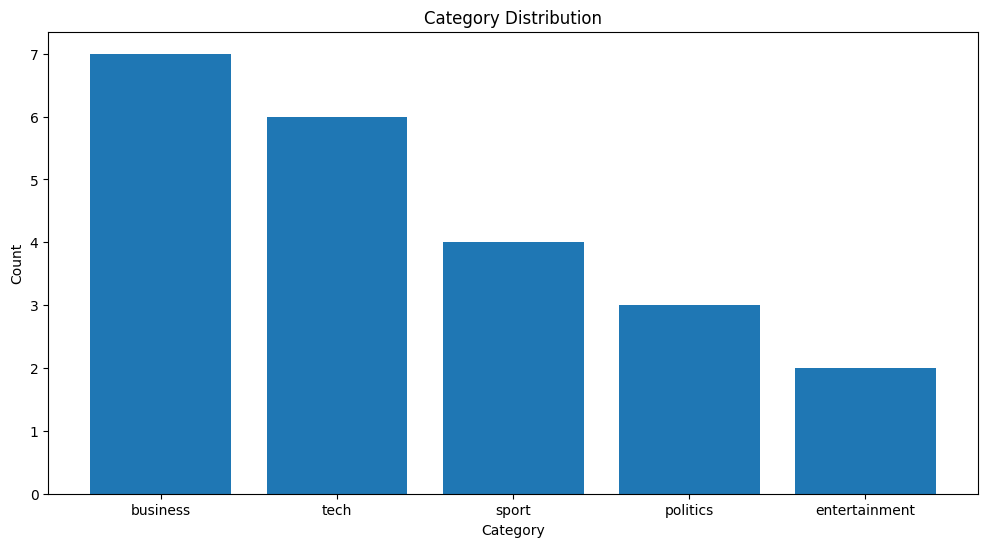

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))

plt.bar(news_summaries_df["category"].value_counts().index,
        news_summaries_df["category"].value_counts().values)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [15]:
average_text_words  = news_summaries_df["text"].apply(lambda x: len(str(x).split())).mean()
print("Average number of words in text column: ", round(average_text_words, 2))


Average number of words in text column:  367.41


In [16]:
average_summary_words  = news_summaries_df["summary"].apply(lambda x: len(str(x).split())).mean()
print("Average number of words in summary column: ", round(average_summary_words, 2))

Average number of words in summary column:  155.45


In [17]:
news_summaries_df["text length"] = news_summaries_df["text"].apply(lambda x: len(str(x).split()))
news_summaries_df["summary length"] = news_summaries_df["summary"].apply(lambda x: len(str(x).split()))

news_summaries_df.head()

,category,file_id,text,summary,text length,summary length
1907,entertainment,135,Vibe awards back despite violence\n\nThe US Vi...,Rapper Young Buck has been charged after alleg...,216,91
2218,entertainment,112,Elvis set to top UK singles chart\n\nRock 'n' ...,"If the record does make the top spot, it will ...",183,73
661,politics,040,Lords wrong on detainees - Straw\n\nJack Straw...,"He said the Law Lords' ruling was an ""embarras...",578,252
353,sport,353,Scots suffer another injury blow\n\nScotland's...,"Another potential option, Glasgow flanker Andr...",258,108
1056,business,440,US trade deficit widens sharply\n\nThe gap bet...,Although China's overall trade surplus is expa...,416,148


In [18]:
category_means = news_summaries_df.groupby("category")[["text length", "summary length"]].mean()
category_means

,text length,summary length
category,,
business,296.000000,127.857143
entertainment,199.500000,82.000000
politics,515.000000,226.000000
sport,255.750000,108.500000
tech,507.333333,208.166667


<Figure size 1200x600 with 0 Axes>

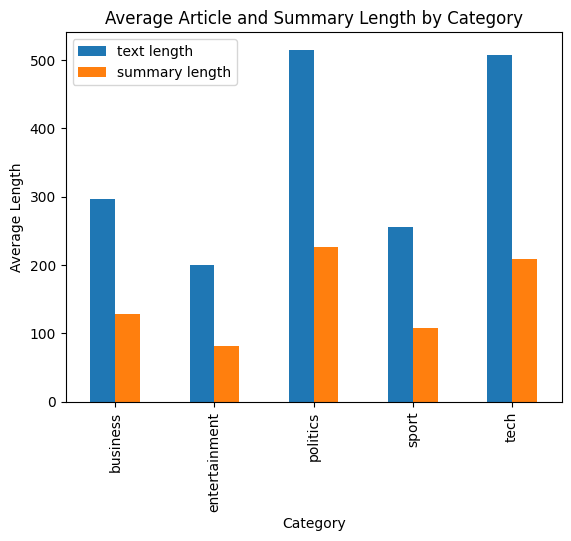

In [19]:
plt.figure(figsize = (12, 6))
category_means.plot(kind = "bar")
plt.title("Average Article and Summary Length by Category")
plt.xlabel("Category")
plt.ylabel("Average Length")
plt.show()

In [20]:
from datasets import Dataset
news_summaries_dataset = Dataset.from_pandas(news_summaries_df)
news_summaries_dataset

Dataset({
    features: ['category', 'file_id', 'text', 'summary', 'text length', 'summary length', '__index_level_0__'],
    num_rows: 22
})

In [21]:
news_summaries_dataset = news_summaries_dataset.remove_columns(["category","text length","summary length","__index_level_0__"])
news_summaries_dataset

Dataset({
    features: ['file_id', 'text', 'summary'],
    num_rows: 22
})

In [22]:
news_summaries_dataset = news_summaries_dataset.train_test_split(test_size = 0.2, seed = 42)
news_summaries_dataset

DatasetDict({
    train: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 17
    })
    test: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 5
    })
})

In [23]:
news_summaries_dataset.shape

{'train': (17, 3), 'test': (5, 3)}

In [24]:
news_summaries_dataset["train"].features

{'file_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'summary': Value(dtype='string', id=None)}

In [25]:
def clean_text(example):
  for text in ["text", "summary"]:
    example[text] = example[text].lower()
    example[text] = example[text].replace("\\", "")
    example[text] = example[text].replace("/", "")
    example[text] = example[text].replace("\n", "")
    example[text] = example[text].replace("`", "")
    example[text] = example[text].replace('"', "")
    example[text] = example[text].replace("-", "")
  return example

In [26]:
news_summaries_dataset = news_summaries_dataset.map(clean_text)
news_summaries_dataset

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 17
    })
    test: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 5
    })
})

In [30]:
EXAMPLE_TEXT_INDEX = 12
examples_text = news_summaries_dataset["train"]["text"][EXAMPLE_TEXT_INDEX]
examples_text

"us trade deficit widens sharplythe gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record.figures from the commerce department for november showed exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand. part of the expanding deficit came from high prices for oil imports. but the numbers suggested the sliding dollar  which makes exports less expensive  has had little impact, and could indicate slowing economic growth.the trade deficit  far bigger than the $54bn widely expected on wall street  prompted a rapid response from the currency markets.by 1650 gmt, the dollar was trading against the euro at $1.3280, almost a cent and a half weaker than before the announcement. against the pound, the dollar was down about 0.7% at $1,8923. the dollar's fall has been sudden, violent and appropriate given this number, said brian taylor of wells fargo in minneapolis. recent exchange rate movements certainly haven't had any

In [31]:
MODEL_NAME = "t5-small"
MODEL_NAME

't5-small'

In [32]:
from transformers import pipeline
prefix = "summarize: "
summarizer = pipeline("summarization", model = MODEL_NAME, tokenizer = MODEL_NAME)
summary_text = summarizer(prefix + examples_text)[0]["summary_text"]
summary_text

Token indices sequence length is longer than the specified maximum sequence length for this model (571 > 512). Running this sequence through the model will result in indexing errors


'us trade deficit widens sharply to more than $60bn (â£31.7bn), an alltime record . exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand . the sliding dollar which makes exports less expensive has had little impact .'

In [33]:
summarizer = pipeline("summarization", model = MODEL_NAME, truncation = True)
summary_text = summarizer(prefix + examples_text)[0]["summary_text"]
summary_text

'the gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record . exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand . the sliding dollar which makes exports less expensive has had little impact .'

In [34]:
ref_text = news_summaries_dataset["train"]["summary"][EXAMPLE_TEXT_INDEX]
ref_text

"although china's overall trade surplus is expanding, according to chinese government figures, the commerce department revealed the us's deficit with china was $19.6bn in november, down from $19.7bn the month before.against the pound, the dollar was down about 0.7% at $1,8923.but the deficit with japan was at its worst in more than four years.the gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record.one small bright spot for us policymakers was a slight decline in the deficit with china, often blamed for job losses and other economic woes.by 1650 gmt, the dollar was trading against the euro at $1.3280, almost a cent and a half weaker than before the announcement.but the numbers suggested the sliding dollar  which makes exports less expensive  has had little impact, and could indicate slowing economic growth.the trade deficit is a large part of the latter."

In [35]:
import evaluate
rouge = evaluate.load("rouge")
rouge

EvaluationModule(name: "rouge", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id=None)}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLsum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/

In [36]:
result = rouge.compute(predictions = [summary_text], references = [ref_text], use_stemmer = True)
result

{'rouge1': 0.32380952380952377,
 'rouge2': 0.2692307692307692,
 'rougeL': 0.29523809523809524,
 'rougeLsum': 0.29523809523809524}

In [37]:
article_texts = news_summaries_dataset["test"]["text"]
article_summaries = news_summaries_dataset["test"]["summary"]

In [38]:
from tqdm import tqdm
candidate_summaries = []
prefix = "summarize: "
for i, text in enumerate(tqdm(article_texts[:10])):
  candidate = summarizer(prefix + text)
  candidate_summaries.append(candidate[0]["summary_text"])
print(candidate_summaries)

100%|██████████| 5/5 [00:45<00:00,  9.00s/it]

["dunne is keen to commit to manchester city after turning his career around . the 25-year-old was once threatened with the sack by city boss kevin keegan . graeme souness is said to have been impressed enough by the defender's turnaround in form .", "kathy butler wins 25th cross internacional de venta de banos in spain . briton karl keska finishes seventh in men's 10.6km race . abebe dinkessa of ethiopia wins iaaf crosscountry race in 33.22 .", 'the chancellor would not comment on the reports, but insisted he would not be diverted or distracted from tackling the challenges faced by the country . mr blair earlier dismissed the claim he had reneged on a promise to stand aside for gordon brown as old news .', 'google will not be paid for the links . it will take six years to digitise the full collection at michigan . harvard is limiting its participation to 40,000 books .', "china's net users number 100m but this represents less than 8% of the country's 1.3 billion people . net users in 

In [39]:
result_agg = rouge.compute(predictions = candidate_summaries, references = article_summaries[0:10],
                           use_stemmer = True)
result_agg

{'rouge1': 0.27514685743364214,
 'rouge2': 0.18055468168805897,
 'rougeL': 0.20384156393533565,
 'rougeLsum': 0.20384156393533562}

In [40]:
result_unagg = rouge.compute(predictions = candidate_summaries, references = article_summaries[0:10],
                           use_stemmer = True,
                           use_aggregator = False)
result_unagg

{'rouge1': [0.35789473684210527,
  0.27419354838709675,
  0.18235294117647058,
  0.21800947867298578,
  0.34328358208955223],
 'rouge2': [0.26595744680851063,
  0.13114754098360654,
  0.12426035502958581,
  0.09569377990430622,
  0.2857142857142857],
 'rougeL': [0.28421052631578947,
  0.20967741935483872,
  0.16470588235294117,
  0.15165876777251186,
  0.208955223880597],
 'rougeLsum': [0.28421052631578947,
  0.20967741935483872,
  0.16470588235294117,
  0.15165876777251186,
  0.208955223880597]}

In [41]:
import numpy as  np
result_unagg_rsum = np.array(result_unagg["rouge2"])

best_summary_index = np.argmax(result_unagg_rsum)
worst_summary_index = np.argmin(result_unagg_rsum)

best_summary_index, worst_summary_index

(4, 3)

In [43]:
import pandas as pd
act_vs_pred_summaries_df = pd.DataFrame(
    list(zip(article_summaries[0:10], candidate_summaries)),
    columns = ["actual_summary", "predicted_summary"]
)

act_vs_pred_summaries_df.sample(5)

,actual_summary,predicted_summary
1,gelete burka then crowned a great day for ethi...,kathy butler wins 25th cross internacional de ...
0,i definitely want to stay at city because i ha...,dunne is keen to commit to manchester city aft...
2,in a separate interview with bbc political edi...,the chancellor would not comment on the report...
4,the net is key to helping chinese people keep ...,china's net users number 100m but this represe...
3,online pages from scanned books will not have ...,google will not be paid for the links . it wil...


In [44]:
print(act_vs_pred_summaries_df.iloc[best_summary_index])
print(act_vs_pred_summaries_df.iloc[worst_summary_index])

actual_summary       the net is key to helping chinese people keep ...
predicted_summary    china's net users number 100m but this represe...
Name: 4, dtype: object
actual_summary       online pages from scanned books will not have ...
predicted_summary    google will not be paid for the links . it wil...
Name: 3, dtype: object


In [45]:
print(act_vs_pred_summaries_df._get_value(best_summary_index, "predicted_summary"))
print(act_vs_pred_summaries_df._get_value(best_summary_index, "actual_summary"))

china's net users number 100m but this represents less than 8% of the country's 1.3 billion people . net users in china will exceed the 137 million us users of the net by 2008 . in many western nations desktop computers can access the net are hard to escape at work .
the net is key to helping chinese people keep in touch with friends, said mr makower.already net use in china has a very different character than in many western nations, said william makower, chief executive of panlogic.the report says that the country's culture will mean that chinese people will use the net for very different ends than in many other nations.what people can do on the net is also limited by aspects of chinese life.for instance, said mr makower, credit cards are rare in china partly because of fears people have about getting in to debt.market analysts panlogic predicts that net users in china will exceed the 137 million us users of the net by 2008.government restrictions on how much advertising can appear o

In [46]:
print(act_vs_pred_summaries_df._get_value(worst_summary_index, "predicted_summary"))
print(act_vs_pred_summaries_df._get_value(worst_summary_index, "actual_summary"))

google will not be paid for the links . it will take six years to digitise the full collection at michigan . harvard is limiting its participation to 40,000 books .
online pages from scanned books will not have adverts but will have links to online store amazon, google said.the new york library is allowing google to include a small portion of books no longer covered by copyright.the full libraries of michigan and stanford universities, as well as archives at harvard, oxford and the new york public library are included.we hope that oxford's contribution to this project will be of scholarly use, as well as general interest, to people around the world, said reg carr, director of oxford university library services.harvard is limiting its participation to 40,000 books, while oxford wants google to scan books originally published in the 19th century and held in the bodleian library.there will also be links to public libraries so that the books can be borrowed.it's a significant opportunity t

In [47]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer(["hello world"])

{'input_ids': [[21820, 296, 1]], 'attention_mask': [[1, 1, 1]]}

In [48]:
tokens = tokenizer.tokenize("hello world")
tokens

['▁hello', '▁world']

In [49]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[21820, 296]

In [50]:
prefix = "summarize:"

def preprocess_function(examples):
  inputs = [prefix + example for example in examples["text"]]
  model_inputs = tokenizer(inputs, max_length = 1024, truncation = True)

  labels = tokenizer(text_target = examples["summary"], max_length = 128, truncation = True)

  model_inputs["labels"] = labels["input_ids"]
  return model_inputs

In [51]:
news_summaries_dataset

DatasetDict({
    train: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 17
    })
    test: Dataset({
        features: ['file_id', 'text', 'summary'],
        num_rows: 5
    })
})

In [52]:
tokenized_news_summaries_dataset = news_summaries_dataset.map(preprocess_function, batched = True)
tokenized_news_summaries_dataset

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['file_id', 'text', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 17
    })
    test: Dataset({
        features: ['file_id', 'text', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 5
    })
})

In [53]:
tokenized_news_summaries_dataset["train"]["labels"][0][:10]

[181, 1947, 2470, 6, 80, 13, 8, 296, 31, 7]

In [54]:
tokenized_news_summaries_dataset["train"]["input_ids"][0][:10]

[21603, 10, 849, 15, 40, 1669, 3, 31, 235, 1340]

In [55]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer, model = MODEL_NAME)

In [56]:
import tensorflow as tf
from transformers import create_optimizer, AdamWeightDecay
from transformers import TFAutoModelForSeq2SeqLM
from transformers.keras_callbacks import KerasMetricCallback

model = TFAutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [57]:
optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate = 0.01)
optimizer

In [58]:
BATCH_SIZE = 2
BATCH_SIZE

2

In [59]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_news_summaries_dataset["train"],
    shuffle = True,
    batch_size = BATCH_SIZE,
    collate_fn = data_collator,

)

tf_test_set = model.prepare_tf_dataset(
    tokenized_news_summaries_dataset["test"],
    shuffle = False,
    batch_size = BATCH_SIZE,
    collate_fn = data_collator,

)


/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


In [60]:
model.compile(optimizer = optimizer)
model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# lr_reduce_callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor = "val_loss",
#     factor = 0.5,
#     patience = 2,
#     verbose = 0,
#     mode = "auto",
#     min_delta = 0.0001,
#     cooldown = 0,
#     min_lr = 0
# )



In [61]:
model.fit(x = tf_train_set,
          validation_data = tf_test_set,
          epochs = 1
          # callbacks = [lr_reduce_callback]
          )

8/8 [==============================] - 115s 11s/step - loss: 2.2376 - val_loss: 2.1455


In [63]:
# Save your trained TensorFlow model to a local directory
model.save_pretrained("my_summarization_model")
tokenizer.save_pretrained('my_summarization_model')

('my_summarization_model/tokenizer_config.json',
 'my_summarization_model/special_tokens_map.json',
 'my_summarization_model/spiece.model',
 'my_summarization_model/added_tokens.json',
 'my_summarization_model/tokenizer.json')

In [65]:
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM
model = TFAutoModelForSeq2SeqLM.from_pretrained('my_summarization_model')
tokenizer = AutoTokenizer.from_pretrained('my_summarization_model')

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at my_summarization_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [66]:
examples_text

"us trade deficit widens sharplythe gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record.figures from the commerce department for november showed exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand. part of the expanding deficit came from high prices for oil imports. but the numbers suggested the sliding dollar  which makes exports less expensive  has had little impact, and could indicate slowing economic growth.the trade deficit  far bigger than the $54bn widely expected on wall street  prompted a rapid response from the currency markets.by 1650 gmt, the dollar was trading against the euro at $1.3280, almost a cent and a half weaker than before the announcement. against the pound, the dollar was down about 0.7% at $1,8923. the dollar's fall has been sudden, violent and appropriate given this number, said brian taylor of wells fargo in minneapolis. recent exchange rate movements certainly haven't had any

In [68]:
from transformers import pipeline

prefix = "summarize: "
summarizer = pipeline(
    "summarization",
    model = model,
    tokenizer = tokenizer,
    truncation = True
)

summary_text = summarizer(prefix + examples_text)[0]["summary_text"]
summary_text

'us trade deficit widens sharply the gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record . figures from the commerce department showed exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand . the sliding dollar which makes exports less expensive has had little impact .'

In [69]:
inputs = tokenizer(prefix + examples_text, return_tensors = "tf", truncation = True).input_ids
inputs

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[21603,    10,   178,  1668, 11724,  1148,    29,     7,  4816,
          120,   532,  6813,   344,   178,  4202,     7,    11,  4830,
            7,    65,     3, 12018,  4632,    12,    72,   145, 25659,
          115,    29,    41,  1439, 19853,   519, 18596,   115,    29,
          201,    46,    66,   715,  1368,     5,  9178,    15,     7,
           45,     8, 12794,  3066,    21,     3,  5326, 18247,  3217,
         4202,     7,   323,  1682,  5170,    12, 16616, 25134,   115,
           29,     6,   298,  4830,     7,     3,  4774,  1300,  5170,
           12, 15287,  9125,   927,   115,    29,    30,  6937,  3733,
         2173,     5,   294,    13,     8,  9471, 11724,   764,    45,
          306,  1596,    21,  1043,  4830,     7,     5,    68,     8,
         2302,  5259,     8, 13441,  6816,    84,   656,  4202,     7,
          705,  2881,    65,   141,   385,  1113,     6,    11,   228,
         6360,  2684,    53, 

In [70]:
outputs = model.generate(inputs, max_new_tokens = 100, do_sample = False)
outputs

<tf.Tensor: shape=(1, 101), dtype=int32, numpy=
array([[    0,   178,  1668, 11724,  1148,    29,     7,  4816,   120,
            8,  6813,   344,   178,  4202,     7,    11,  4830,     7,
           65,     3, 12018,  4632,    12,    72,   145, 25659,   115,
           29,    41,  1439, 19853,   519, 18596,   115,    29,   201,
           46,    66,   715,  1368,     3,     5,  4202,     7,   323,
         1682,  5170,    12, 16616, 25134,   115,    29,     6,   298,
         4830,     7,     3,  4774,  1300,  5170,    12, 15287,  9125,
          927,   115,    29,    30,  6937,  3733,  2173,     3,     5,
            8, 13441,  6816,    84,   656,  4202,     7,   705,  2881,
           65,   141,   385,  1113,     6,    11,   228,  6360,  2684,
           53,  1456,  1170,     3,     5,     1,     0,     0,     0,
            0,     0]], dtype=int32)>

In [71]:
tokenizer.decode(outputs[0], skip_special_tokens = True)

'us trade deficit widens sharply the gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record. exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand. the sliding dollar which makes exports less expensive has had little impact, and could indicate slowing economic growth.'

In [72]:
ref_text

"although china's overall trade surplus is expanding, according to chinese government figures, the commerce department revealed the us's deficit with china was $19.6bn in november, down from $19.7bn the month before.against the pound, the dollar was down about 0.7% at $1,8923.but the deficit with japan was at its worst in more than four years.the gap between us exports and imports has widened to more than $60bn (â£31.7bn), an alltime record.one small bright spot for us policymakers was a slight decline in the deficit with china, often blamed for job losses and other economic woes.by 1650 gmt, the dollar was trading against the euro at $1.3280, almost a cent and a half weaker than before the announcement.but the numbers suggested the sliding dollar  which makes exports less expensive  has had little impact, and could indicate slowing economic growth.the trade deficit is a large part of the latter."

In [74]:
result = rouge.compute(
    predictions = [summary_text],
    references = [ref_text],
    use_stemmer = True
)
result

{'rouge1': 0.3800904977375565,
 'rouge2': 0.28310502283105027,
 'rougeL': 0.3076923076923077,
 'rougeLsum': 0.3076923076923077}

In [75]:
from tqdm import tqdm
candidate_summaries = []
prefix = "summarize: "
for i, text in enumerate(tqdm(article_texts[:10])):
  candidate = summarizer(prefix + text)
  candidate_summaries.append(candidate[0]["summary_text"])
print(candidate_summaries)

100%|██████████| 5/5 [02:43<00:00, 32.67s/it]

["dunne is keen to commit to manchester city after turning his career around . the 25-year-old was once threatened with the sack by city boss kevin keegan . graeme souness is said to have been impressed enough by the defender's turnaround in form .", "kathy butler wins 25th cross internacional de venta de banos in spain . briton karl keska finishes seventh in men's 10.6km race . abebe dinkessa of ethiopia wins iaaf crosscountry race in 33.22 . gelete burka wins women's race in brussels .", 'the chancellor would not comment on the reports, but insisted he would not be diverted or distracted from tackling the challenges faced by the country . mr blair earlier dismissed the claim he had reneged on a promise to stand aside for gordon brown as old news .', 'google will not be paid for providing for the links . it will take six years to digitise the full collection at michigan . harvard is limiting its participation to 40,000 books .', "china's net users number 100m but this represents less 

In [76]:
result_agg = rouge.compute(predictions = candidate_summaries, references = article_summaries[0:10],
                           use_stemmer = True)
result_agg

{'rouge1': 0.28224382898968703,
 'rouge2': 0.1920235307735724,
 'rougeL': 0.20583423905176104,
 'rougeLsum': 0.20583423905176104}

In [77]:
result_unagg = rouge.compute(predictions = candidate_summaries, references = article_summaries[0:10],
                           use_stemmer = True,
                           use_aggregator = False)
result_unagg

{'rouge1': [0.35789473684210527,
  0.3333333333333333,
  0.18235294117647058,
  0.215962441314554,
  0.31906614785992216],
 'rouge2': [0.26595744680851063,
  0.16923076923076924,
  0.12426035502958581,
  0.0947867298578199,
  0.3058823529411765],
 'rougeL': [0.28421052631578947,
  0.21212121212121213,
  0.16470588235294117,
  0.15023474178403756,
  0.21789883268482488],
 'rougeLsum': [0.28421052631578947,
  0.21212121212121213,
  0.16470588235294117,
  0.15023474178403756,
  0.21789883268482488]}

In [78]:
import numpy as  np
result_unagg_rsum = np.array(result_unagg["rouge2"])

best_summary_index = np.argmax(result_unagg_rsum)
worst_summary_index = np.argmin(result_unagg_rsum)

best_summary_index, worst_summary_index

(4, 3)

In [79]:
import pandas as pd
act_vs_pred_summaries_df = pd.DataFrame(
    list(zip(article_summaries[0:10], candidate_summaries)),
    columns = ["actual_summary", "predicted_summary"]
)

act_vs_pred_summaries_df.sample(5)

,actual_summary,predicted_summary
1,gelete burka then crowned a great day for ethi...,kathy butler wins 25th cross internacional de ...
0,i definitely want to stay at city because i ha...,dunne is keen to commit to manchester city aft...
3,online pages from scanned books will not have ...,google will not be paid for providing for the ...
2,in a separate interview with bbc political edi...,the chancellor would not comment on the report...
4,the net is key to helping chinese people keep ...,china's net users number 100m but this represe...


In [80]:
print(act_vs_pred_summaries_df.iloc[best_summary_index])
print(act_vs_pred_summaries_df.iloc[worst_summary_index])

actual_summary       the net is key to helping chinese people keep ...
predicted_summary    china's net users number 100m but this represe...
Name: 4, dtype: object
actual_summary       online pages from scanned books will not have ...
predicted_summary    google will not be paid for providing for the ...
Name: 3, dtype: object


In [81]:
print(act_vs_pred_summaries_df._get_value(worst_summary_index, "predicted_summary"))
print(act_vs_pred_summaries_df._get_value(worst_summary_index, "actual_summary"))

google will not be paid for providing for the links . it will take six years to digitise the full collection at michigan . harvard is limiting its participation to 40,000 books .
online pages from scanned books will not have adverts but will have links to online store amazon, google said.the new york library is allowing google to include a small portion of books no longer covered by copyright.the full libraries of michigan and stanford universities, as well as archives at harvard, oxford and the new york public library are included.we hope that oxford's contribution to this project will be of scholarly use, as well as general interest, to people around the world, said reg carr, director of oxford university library services.harvard is limiting its participation to 40,000 books, while oxford wants google to scan books originally published in the 19th century and held in the bodleian library.there will also be links to public libraries so that the books can be borrowed.it's a significant